# KNN Classifier with GridSearchCV Tuning

# Read the CSV and Perform Basic Data Cleaning

In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# df = pd.read_csv("./Resources/insurance_claims.csv")
# # Drop the null columns where all values are null
# df = df.dropna(axis='columns', how='all')
# # Drop the null rows
# df = df.dropna()
# df.head()

In [3]:
# df = pd.read_csv("exoplanet_data.csv")
df = pd.read_csv("./Resources1/claims_accident_pgsql.csv")
# Drop the null columns where all values are null
df1 = df.dropna(axis='columns', how='all')
# Drop the null rows
# df = df.dropna()
df.head()

,age,auto_year,incident_hour_of_the_day,number_of_vehicles_involved,visibility,temperature,humidity,wind_speed,precipitation
0,48,2004,5,1,10.0,76.0,62.0,3.0,0.0
1,42,2007,8,1,10.0,51.0,80.0,6.0,0.0
2,29,2007,7,3,10.0,53.6,16.0,4.6,NaN
3,41,2014,5,1,10.0,84.2,84.0,13.8,NaN
4,44,2009,20,1,10.0,73.4,33.0,6.9,NaN


In [4]:
df.columns

Index(['age', 'auto_year', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'visibility', 'temperature', 'humidity',
       'wind_speed', 'precipitation'],
      dtype='object')

In [6]:
# Set features. This will also be used as your x values.
training_selected_features = df[['age',	'auto_year',	'incident_hour_of_the_day',	'number_of_vehicles_involved',	'visibility',	'temperature',	'humidity',	'wind_speed',	'precipitation']].dropna()
training_selected_features

,age,auto_year,incident_hour_of_the_day,number_of_vehicles_involved,visibility,temperature,humidity,wind_speed,precipitation
0,48,2004,5,1,10.0,76.0,62.0,3.0,0.0
1,42,2007,8,1,10.0,51.0,80.0,6.0,0.0
5,39,2003,19,3,2.0,28.0,88.0,3.0,0.0
6,34,2012,0,3,10.0,55.0,40.0,5.0,0.0
8,33,2012,21,1,5.0,57.0,77.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...
990,43,2013,18,1,10.0,79.0,54.0,9.0,0.0
993,28,2012,20,3,10.0,38.0,86.0,0.0,0.0
994,30,1996,6,1,4.0,19.0,92.0,9.2,0.0
997,34,1996,4,3,10.0,67.0,61.0,7.0,0.0


# Create a Train Test Split

Use 'auto_year' for the y values

In [7]:
X = training_selected_features
y = training_selected_features['auto_year']
print(X.shape, y.shape)

(549, 9) (549,)


In [8]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [26]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

# Train the Model

k: 1, Train/Test Score: 1.000/0.210
k: 3, Train/Test Score: 0.457/0.138
k: 5, Train/Test Score: 0.421/0.159
k: 7, Train/Test Score: 0.399/0.159
k: 9, Train/Test Score: 0.367/0.174
k: 11, Train/Test Score: 0.309/0.159
k: 13, Train/Test Score: 0.316/0.174
k: 15, Train/Test Score: 0.321/0.196
k: 17, Train/Test Score: 0.299/0.203
k: 19, Train/Test Score: 0.282/0.188
k: 21, Train/Test Score: 0.258/0.152
k: 23, Train/Test Score: 0.263/0.152
k: 25, Train/Test Score: 0.248/0.145
k: 27, Train/Test Score: 0.251/0.152
k: 29, Train/Test Score: 0.243/0.152


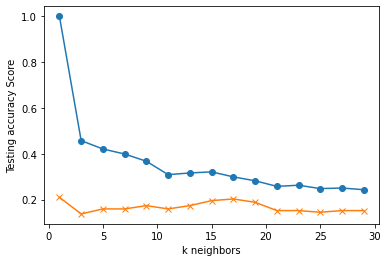

In [27]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax, y_train)
    train_score = knn.score(X_train_minmax, y_train)
    test_score = knn.score(X_test_minmax, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [28]:
# Note that k: 19 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_minmax, y_train)
print('k=19 Train Acc: %.3f' % knn.score(X_train_minmax, y_train))
print('k=19 Test Acc: %.3f' % knn.score(X_test_minmax, y_test))

k=19 Train Acc: 0.282
k=19 Test Acc: 0.188


In [29]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 19,
 'p': 2,
 'weights': 'uniform'}

In [30]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
weight_options = ["uniform", "distance"]
metrics = ['euclidean', 'manhattan', 'minkowski']

param_grid = dict(n_neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29], weights = weight_options, metric=metrics)

grid = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy', verbose=3)
grid.fit(X_train_minmax, y_train)

e=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=15, weights=uniform; total ti

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [31]:
# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.31369379958859833
{'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=29, weights='distance')


In [32]:
knn = KNeighborsClassifier(n_neighbors=29, weights='distance', metric='manhattan')
knn.fit(X_train_minmax, y_train)
print('k=29 Train Acc: %.3f' % knn.score(X_train_minmax, y_train))
print('k=29 Test Acc: %.3f' % knn.score(X_test_minmax, y_test))

k=29 Train Acc: 1.000
k=29 Test Acc: 0.312


In [33]:
predictions = grid.predict(X_test_minmax)
predictions

array([1996, 2014, 2008, 2001, 1999, 2002, 2011, 2003, 2015, 1996, 2002,
       2015, 2003, 1997, 2005, 2013, 1997, 2005, 2007, 2008, 2000, 1996,
       2003, 1996, 1995, 2014, 2005, 1999, 1997, 1997, 2013, 1995, 1998,
       2013, 2013, 2003, 2003, 2013, 2009, 2003, 1995, 2003, 1997, 1995,
       1997, 2005, 2011, 2009, 2013, 1995, 2009, 2011, 2002, 2013, 2004,
       2004, 1997, 1998, 1999, 2005, 1995, 1997, 2003, 2001, 2014, 2014,
       2008, 1996, 2008, 2005, 2003, 2013, 2010, 2006, 2006, 1996, 2010,
       2003, 1997, 1997, 2010, 1999, 2012, 2000, 2012, 2003, 1997, 2011,
       2007, 1997, 2005, 2005, 2006, 1995, 2005, 2014, 2001, 2008, 2008,
       2005, 2013, 2014, 2001, 1995, 2003, 1998, 2013, 2008, 1996, 2003,
       2001, 2010, 2003, 2008, 2006, 2014, 2011, 2014, 2002, 2006, 2011,
       2004, 2010, 2002, 1997, 1995, 2000, 2014, 2006, 1997, 1996, 2010,
       2011, 2005, 2008, 2014, 2013, 2008])

In [34]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test.tolist()}).reset_index(drop=True)
results

,Prediction,Actual
0,1996,1997
1,2014,2012
2,2008,2006
3,2001,2002
4,1999,2000
...,...,...
133,2005,2005
134,2008,2008
135,2014,2015
136,2013,2010


In [35]:
results.head(10)

,Prediction,Actual
0,1996,1997
1,2014,2012
2,2008,2006
3,2001,2002
4,1999,2000
5,2002,2002
6,2011,2013
7,2003,2000
8,2015,2011
9,1996,1995


In [36]:
results.tail(10)

,Prediction,Actual
128,2006,2004
129,1997,1997
130,1996,1997
131,2010,2004
132,2011,2010
133,2005,2005
134,2008,2008
135,2014,2015
136,2013,2010
137,2008,2005


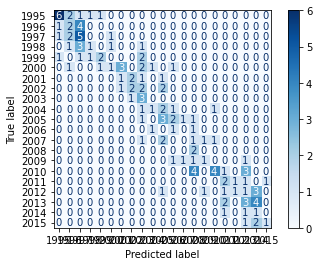

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test_minmax, y_test, cmap="Blues")
plt.show()

In [38]:
plt.scatter(grid.predict(X_train), grid.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(grid.predict(X_test), grid.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

NameError: name 'model' is not defined

In [24]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, predictions,
#                             target_names=['class 1(age)', 'class 2(total_claim_amount)', 'class 3(auto_year)','class 4(incident_hour_of_the_day)', 'class 5(injury_claim)','class 6(property_claim)', 'class 7(property_claim)', 'class 8(vehicle_claim)']


In [25]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Adebayo_KNN.sav'
joblib.dump(knn, filename)

['Adebayo_KNN.sav']